# Author: Aditi Langar

~ Under the GRIP tasks by The Sparks Founadtion in December 2020

## Problem Statement: To predict the scores of students based on the total number of hours that they study.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the Dataset

In [2]:
df = pd.read_csv("student_scores.csv")

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Exploration

#### Checking Data info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Checking the shape of the data

In [4]:
df.shape

(25, 2)

#### Checking for blank values

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Checking for duplicated values

In [6]:
df.duplicated().sum()

0

## Univariate Analysis

#### Histogrm for hours

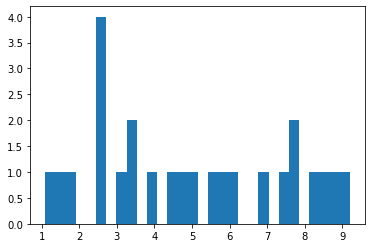

In [7]:
plt.hist(df.Hours, bins = 30);

#### Total unique values for scores

In [8]:
df.Scores.nunique()

23

#### Histogram for scores

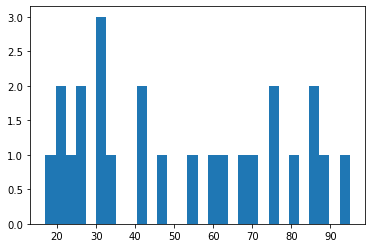

In [9]:
plt.hist(df.Scores, bins = 30);

#### Checking Data Distribution

Feature:  Hours


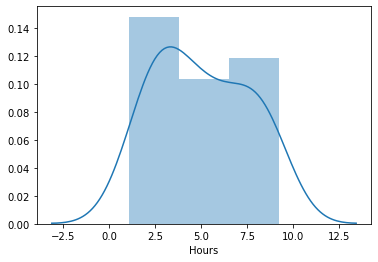

*****************************************************************************************************************************
Feature:  Scores


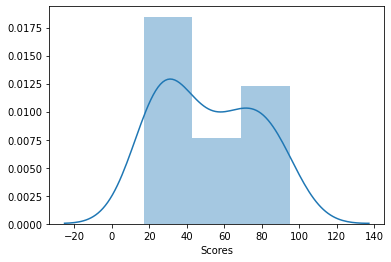

*****************************************************************************************************************************


In [10]:
for col in df.columns:
    print("Feature: ",col)
    sns.distplot(df[col])
    plt.show()
    print("*"*125)

The variables have a normal distribution

## Bivariate Analysis

#### Checking relationship between hours and scores

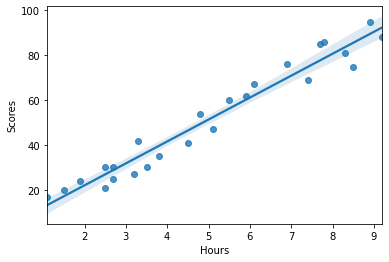

In [11]:
sns.regplot(x = "Hours", y="Scores", data = df)

There exists a linear relationship between the 2 variables

#### Checking the variation in total hours wrt total scores

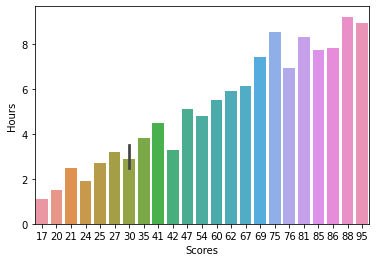

In [12]:
sns.barplot(df.Scores, df.Hours)

The scores have increased with an increase in the total number of hours

## Model Building

#### Splitting the data into train and test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
y = df.Scores # Target

X = df.drop(['Scores'], axis = 1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

#### Importing linear regression model from sklearn

In [16]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

#### Plotting the coefficients and intercept

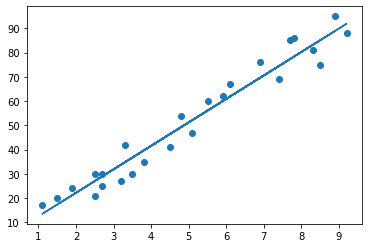

In [17]:
## y = mx + c
line = lm.coef_*X + lm.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#### Making predcitions on the test data

In [18]:
y_pred = lm.predict(X_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [19]:
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
actual_vs_predicted 

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


#### Checking the difference between the actual and the predicted values

In [20]:
actual_vs_predicted["Difference"] = actual_vs_predicted.Actual - actual_vs_predicted.Predicted

actual_vs_predicted

,Actual,Predicted,Difference
8,81,83.188141,-2.188141
16,30,27.032088,2.967912
0,21,27.032088,-6.032088
23,76,69.633232,6.366768
11,62,59.951153,2.048847


#### Visualising the difference between the actual and the predicted values

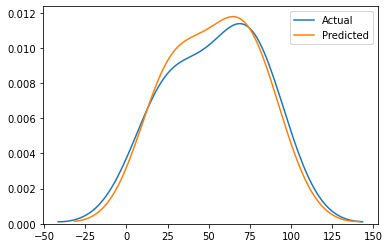

In [21]:
sns.kdeplot(actual_vs_predicted.Actual)
sns.kdeplot(actual_vs_predicted.Predicted)

Very similar predictions

## Model Evaluation

In [22]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, mean_absolute_error, mean_squared_error, r2_score


## checking reports

print('MAE: ',mean_absolute_error(y_test, y_pred))

print('MSE: ', mean_squared_error(y_test, y_pred))

print('RMSE: ',np.sqrt(mean_squared_error(y_test, y_pred)))

print('R2: ',r2_score(y_test, y_pred)*100)

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MAE:  3.9207511902099244
MSE:  18.943211722315272
RMSE:  4.352380006653288
R2:  96.78055545167994
Adjusted R^2: 0.9570740726890659


### The model is 95.7% accurate

## Making predictions for score when total hours = 9.25

In [29]:
hours = 9.25

hours = np.array([[hours]],)

new_pred = lm.predict(hours)

print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(new_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494
